In [1]:

import sys
import os

# Get the parent directory of the current notebook (which is "notebook/")
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
# Add the project root (where src/ is) to sys.path
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

import warnings
warnings.filterwarnings('ignore')

from src.data_preprocessing import load_and_clean_data
from src.feature_engineering import apply_feature_engineering
from src.train_model import train_xgb_model, evaluate_model
from src.predict import get_prediction
from src.dashboard_utils import plot_performance_metrics

In [3]:
# 1. Load and clean data
df = load_and_clean_data("../data/machine failure.csv")

df.head()

,UDI,Product ID,Type,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# 2. Feature engineering
X, y, scaler = apply_feature_engineering(df)
X.head()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Type_H,Type_L,Type_M
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,False,False,True
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,False,True,False
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,False,True,False
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,False,True,False
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,False,True,False


In [5]:
# 3. Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# 4. Model training
model = train_xgb_model(X_train, y_train)

{'accuracy': 0.9835, 'precision': 0.868421052631579, 'recall': 0.5409836065573771, 'f1_score': 0.6666666666666666, 'auc': 0.9721167747444601}


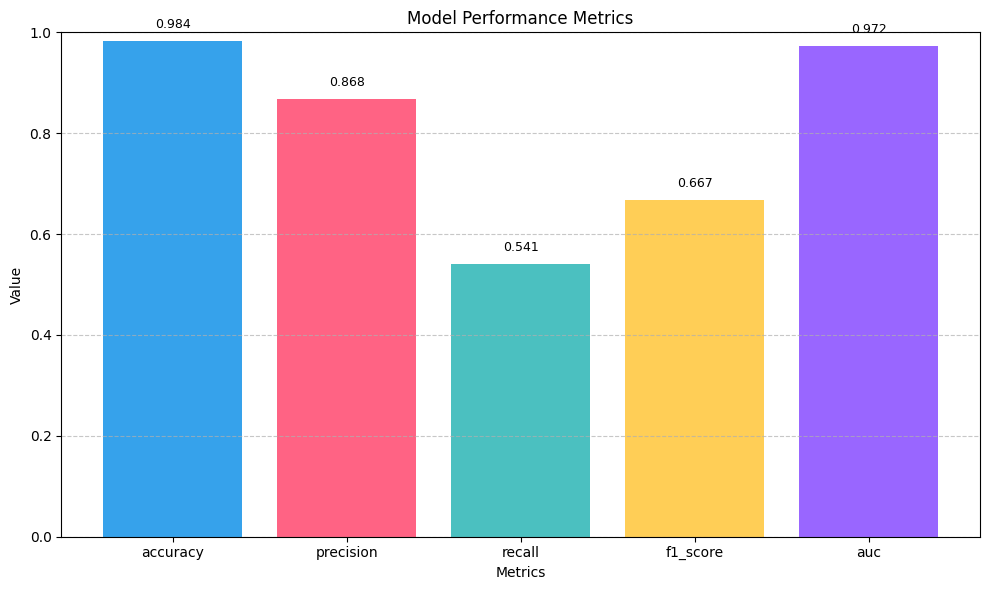

In [7]:
# 5. Evaluation
metrics = evaluate_model(model, X_test, y_test)
print(metrics)
plot_performance_metrics(metrics)

In [8]:
# 6. Single prediction example
new_params = {
    "Air_temperature_K": 298.1,
    "Process_temperature_K": 308.6,
    "Rotational_speed_rpm": 1551,
    "Torque_Nm": 42.8,
    "Tool_wear_min": 0,
    "Type": "L"
}
prediction, probability = get_prediction(model, scaler, new_params, X_columns=X.columns)
print(f"Prediction: {prediction}, Failure Probability: {probability:.2%}")

Prediction: No Failure, Failure Probability: 0.00%
